In [3]:
import pandas as pd
import csv
import numpy as np
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, LeakyReLU, Dropout, BatchNormalization
from keras.optimizers import SGD
from keras import regularizers

Using TensorFlow backend.


In [4]:
X = []
Y = []
identifierDict = {}
idCounter = 1

#Iterate through all csv files and read each file
for i in range(1, 121):
    with open("keystrokeData/Data_" + str(i) + ".csv") as csvFile:
        csvReader = csv.reader(csvFile, delimiter = ',')
        counter = 0
        prediction = ""
        
        #Iterates through each row of the CSV file
        for row in csvReader:
            #Sets the prediction label
            if counter == 0:
                prediction = row
                prediction = "".join(prediction) 

                if prediction not in identifierDict:   
                    identifierDict[prediction] = idCounter #Stores key value pair in the dictionary
                    idCounter += 1
                    #Y.append(prediction) #This is the Prediction (hashed email)
                
                counter += 1

            #This creates the list of keystroke dynamics timings and predicted labels
            else:
                timingList = [row[0], row[1], row[2]]
                X.append(timingList)
                Y.append(prediction)



In [5]:
for identifier in Y:
    Y[Y.index(identifier)] = identifierDict.get(identifier)

In [6]:
# identifierDict

In [7]:
#Converts the list to an array
X = np.array(X)
X

array([['0.0951714', '0', '0.0951714'],
       ['0.082089', '0.1264439', '0.2085329'],
       ['0.1027194', '0.1270245', '0.2297439'],
       ...,
       ['0.2867427', '0.2980735', '0.5848162'],
       ['0.3765701', '0.2569915', '0.6335616'],
       ['0.3011901', '0.2227187', '0.5239088']], dtype='<U10')

In [6]:
#Converts the list to an array
Y = np.array(Y)
Y = to_categorical(Y)
Y
# Y

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [7]:
#Normalises the input features to lie between 0 and 1 (inclusive)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler() 
X_scale = min_max_scaler.fit_transform(X)

In [8]:
X_scale

array([[0.15197865, 0.        , 0.00228961],
       [0.12950264, 0.00857754, 0.00993356],
       [0.16494637, 0.00861693, 0.01136381],
       ...,
       [0.48110463, 0.02022034, 0.03530628],
       [0.63543115, 0.01743347, 0.03859317],
       [0.50592576, 0.01510851, 0.0311993 ]])

In [9]:
from sklearn.model_selection import train_test_split

#Splits the dataset (validation and test size = 20% of overall dataset)
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.8)

In [10]:
#Splits the validation and test set into two separate sets
#70% for testing and 30% for validation
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.7)

In [11]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1197, 3) (1437, 3) (3355, 3) (1197, 21) (1437, 21) (3355, 21)


In [12]:
# #Neural Network Architecture
# model = Sequential([    
#     Dense(100, activation='relu', input_shape=(3,)),
#     Dropout(0.5, input_shape=(3,)),
#     BatchNormalization(),
#     LeakyReLU(alpha=0.01),
    
#     Dense(400, activation= 'relu'),
#     Dropout(0.7, input_shape=(3,)),
#     BatchNormalization(),
#     LeakyReLU(alpha=0.01),
    
#     Dense(100, activation= 'relu'),
#     Dropout(0.5,input_shape=(3,)),
#     BatchNormalization(),
#     LeakyReLU(alpha=.15),
#     Dense(21, activation='softmax'),])


#Neural Network Architecture
model = Sequential([
    Dense(21,activation='relu', input_shape=(3,)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    
    Dense(100, activation='relu'),
    Dropout(0.5, input_shape=(3,)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    
    Dense(400, activation= 'relu'),
    Dropout(0.7, input_shape=(3,)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    
    Dense(100, activation= 'relu'),
    Dropout(0.5,input_shape=(3,)),
    BatchNormalization(),
    
    Dense(21, activation='softmax'),])

In [13]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 21)                84        
_________________________________________________________________
batch_normalization_1 (Batch (None, 21)                84        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 21)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2200      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 100)              

In [15]:
hist = model.fit(X_train, Y_train,
          batch_size = 45, epochs = 500,
         validation_data = (X_val, Y_val))

Train on 1197 samples, validate on 1437 samples
Epoch 1/500
1197/1197 [==============================] - 1s 690us/step - loss: 0.2170 - accuracy: 0.9488 - val_loss: 0.1916 - val_accuracy: 0.9524
Epoch 2/500
1197/1197 [==============================] - 0s 78us/step - loss: 0.2044 - accuracy: 0.9496 - val_loss: 0.1924 - val_accuracy: 0.9524
Epoch 3/500
1197/1197 [==============================] - 0s 77us/step - loss: 0.1951 - accuracy: 0.9509 - val_loss: 0.1936 - val_accuracy: 0.9524
Epoch 4/500
1197/1197 [==============================] - 0s 76us/step - loss: 0.1926 - accuracy: 0.9500 - val_loss: 0.1949 - val_accuracy: 0.9524
Epoch 5/500
1197/1197 [==============================] - 0s 73us/step - loss: 0.1892 - accuracy: 0.9498 - val_loss: 0.1961 - val_accuracy: 0.9524
Epoch 6/500
1197/1197 [==============================] - 0s 74us/step - loss: 0.1837 - accuracy: 0.9499 - val_loss: 0.1973 - val_accuracy: 0.9524
Epoch 7/500
1197/1197 [==============================] - 0s 74us/step - los

Epoch 112/500
1197/1197 [==============================] - 0s 85us/step - loss: 0.1454 - accuracy: 0.9527 - val_loss: 0.1577 - val_accuracy: 0.9528
Epoch 113/500
1197/1197 [==============================] - 0s 92us/step - loss: 0.1462 - accuracy: 0.9527 - val_loss: 0.1547 - val_accuracy: 0.9528
Epoch 114/500
1197/1197 [==============================] - 0s 74us/step - loss: 0.1458 - accuracy: 0.9533 - val_loss: 0.1544 - val_accuracy: 0.9524
Epoch 115/500
1197/1197 [==============================] - 0s 72us/step - loss: 0.1457 - accuracy: 0.9531 - val_loss: 0.1546 - val_accuracy: 0.9528
Epoch 116/500
1197/1197 [==============================] - 0s 71us/step - loss: 0.1442 - accuracy: 0.9535 - val_loss: 0.1560 - val_accuracy: 0.9534
Epoch 117/500
1197/1197 [==============================] - 0s 79us/step - loss: 0.1446 - accuracy: 0.9536 - val_loss: 0.1573 - val_accuracy: 0.9530
Epoch 118/500
1197/1197 [==============================] - 0s 79us/step - loss: 0.1469 - accuracy: 0.9533 - val_

1197/1197 [==============================] - 0s 74us/step - loss: 0.1418 - accuracy: 0.9541 - val_loss: 0.1507 - val_accuracy: 0.9540
Epoch 168/500
1197/1197 [==============================] - 0s 70us/step - loss: 0.1444 - accuracy: 0.9537 - val_loss: 0.1545 - val_accuracy: 0.9543
Epoch 169/500
1197/1197 [==============================] - 0s 74us/step - loss: 0.1420 - accuracy: 0.9546 - val_loss: 0.1560 - val_accuracy: 0.9547
Epoch 170/500
1197/1197 [==============================] - 0s 71us/step - loss: 0.1410 - accuracy: 0.9540 - val_loss: 0.1548 - val_accuracy: 0.9545
Epoch 171/500
1197/1197 [==============================] - 0s 69us/step - loss: 0.1415 - accuracy: 0.9544 - val_loss: 0.1540 - val_accuracy: 0.9543
Epoch 172/500
1197/1197 [==============================] - 0s 70us/step - loss: 0.1411 - accuracy: 0.9537 - val_loss: 0.1547 - val_accuracy: 0.9540
Epoch 173/500
1197/1197 [==============================] - 0s 69us/step - loss: 0.1434 - accuracy: 0.9537 - val_loss: 0.1569 -

1197/1197 [==============================] - 0s 72us/step - loss: 0.1390 - accuracy: 0.9546 - val_loss: 0.1474 - val_accuracy: 0.9543
Epoch 278/500
1197/1197 [==============================] - 0s 72us/step - loss: 0.1398 - accuracy: 0.9544 - val_loss: 0.1446 - val_accuracy: 0.9556
Epoch 279/500
1197/1197 [==============================] - 0s 73us/step - loss: 0.1377 - accuracy: 0.9544 - val_loss: 0.1429 - val_accuracy: 0.9557
Epoch 280/500
1197/1197 [==============================] - 0s 71us/step - loss: 0.1371 - accuracy: 0.9544 - val_loss: 0.1497 - val_accuracy: 0.9549
Epoch 281/500
1197/1197 [==============================] - 0s 73us/step - loss: 0.1387 - accuracy: 0.9545 - val_loss: 0.1460 - val_accuracy: 0.9547
Epoch 282/500
1197/1197 [==============================] - 0s 72us/step - loss: 0.1381 - accuracy: 0.9549 - val_loss: 0.1508 - val_accuracy: 0.9553
Epoch 283/500
1197/1197 [==============================] - 0s 74us/step - loss: 0.1368 - accuracy: 0.9555 - val_loss: 0.1483 -

1197/1197 [==============================] - 0s 74us/step - loss: 0.1368 - accuracy: 0.9548 - val_loss: 0.1419 - val_accuracy: 0.9555
Epoch 388/500
1197/1197 [==============================] - 0s 71us/step - loss: 0.1388 - accuracy: 0.9544 - val_loss: 0.1436 - val_accuracy: 0.9558
Epoch 389/500
1197/1197 [==============================] - 0s 71us/step - loss: 0.1369 - accuracy: 0.9550 - val_loss: 0.1417 - val_accuracy: 0.9560
Epoch 390/500
1197/1197 [==============================] - 0s 72us/step - loss: 0.1354 - accuracy: 0.9548 - val_loss: 0.1404 - val_accuracy: 0.9561
Epoch 391/500
1197/1197 [==============================] - 0s 73us/step - loss: 0.1362 - accuracy: 0.9546 - val_loss: 0.1441 - val_accuracy: 0.9554
Epoch 392/500
1197/1197 [==============================] - 0s 73us/step - loss: 0.1349 - accuracy: 0.9555 - val_loss: 0.1425 - val_accuracy: 0.9554
Epoch 393/500
1197/1197 [==============================] - 0s 71us/step - loss: 0.1355 - accuracy: 0.9549 - val_loss: 0.1491 -

1197/1197 [==============================] - 0s 74us/step - loss: 0.1316 - accuracy: 0.9557 - val_loss: 0.1505 - val_accuracy: 0.9547
Epoch 498/500
1197/1197 [==============================] - 0s 72us/step - loss: 0.1345 - accuracy: 0.9559 - val_loss: 0.1406 - val_accuracy: 0.9558
Epoch 499/500
1197/1197 [==============================] - 0s 74us/step - loss: 0.1336 - accuracy: 0.9554 - val_loss: 0.1432 - val_accuracy: 0.9560
Epoch 500/500
1197/1197 [==============================] - 0s 75us/step - loss: 0.1358 - accuracy: 0.9552 - val_loss: 0.1428 - val_accuracy: 0.9559


In [16]:
model.evaluate(X_test, Y_test)[1]

3355/3355 [==============================] - 0s 17us/step


0.9556882381439209

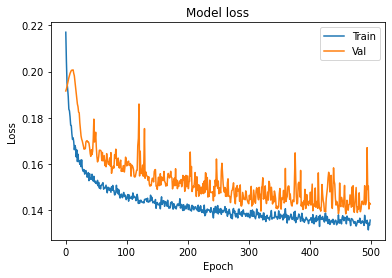

In [17]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

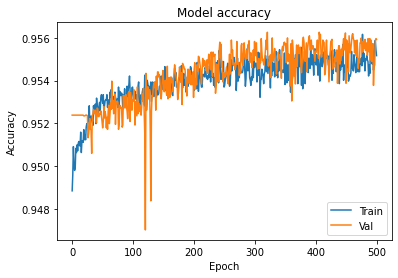

In [18]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()